### Twitter Web-Scraping + Sentiment Analysis + Visualizations ETL Pipeline

#### Necessary Imports

In [1]:
import pandas as pd # DataFrames
import numpy # Numerical Calculations
import os # operating system

# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Smart Progress Meter
from tqdm.notebook import tqdm

# NLP
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Twitter WebScraper
import snscrape.modules.twitter as sntwitter

#### Function to Scrape Tweets into DataFrame + Vaders Sentiment Scores + Display and Save Visualizations

In [2]:
# Note: no @ before username
# Default to True to display and save visualizations

def scrape_and_sentiment_tweets(username, visualizations=True):
    
    # Define twitter webscrpaer to scrape tweets from defined username
    scraper = sntwitter.TwitterSearchScraper(f'from:{username}')
    
    # Create list from iterated data with desired twitter data
    tweets = []
    for i, tweet in tqdm(enumerate(scraper.get_items())):
        data = [
            tweet.date,
            tweet.user.username,
            tweet.content,
            tweet.likeCount,
            tweet.retweetCount
            ]
        tweets.append(data)
    
    # Create pandas data frame from tweets list
    df = pd.DataFrame(tweets, columns=['date',
                                       'username',
                                       'content',
                                       'like_count',
                                       'retweet_count'])
    
    # Insert column with index values (used for later dataframe merging)
    df.insert(loc=0, column='index', value=[i for i in range(len(df))])
    
    # Define Vaders sentiment intensity analzer
    sia = SentimentIntensityAnalyzer()
    
    # Iterate through rows content, determining sentiment analysis for each tweet
    res = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        content = row['content']
        index = row['index']
        res[index] = sia.polarity_scores(content)
    vaders_df = pd.DataFrame(res).T
    vaders_df.insert(loc=0, column='index', value=[i for i in range(len(vaders_df))])
    
    # Merge vaders sentiment analysis scores onto tweets data frame
    df = df.merge(vaders_df, how="left")
    
    # Save pandas dataframe to csv
    data_dir = f'tweet_sentiment_data_{username}'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    df.to_csv(data_dir+"//data.csv")

    
    ## Data Visualizations
    
    if (visualizations == True):
        
        # Define Data Visualizations Directory to save visualizations 
        visualizations_dir = data_dir+'//visualizations//'
        if not os.path.exists(visualizations_dir):
            os.makedirs(visualizations_dir)

        # Pie Chart for Sentiment Score Distribution
        plt.figure(figsize=(8,5), dpi=100)
        data = [df['pos'].mean(),
                df['neu'].mean(),
                df['neg'].mean()]
        labels = ['Positive', 'Neutral', 'Negative']
        colors = ["Green", "Orange", "Red"]
        explode = (.03, .03, .03)
        plt.title(f"Vaders Sentiment Score Distribution \nfor all {username} tweets")
        plt.pie(data,
                labels = labels,
                colors = colors,
                explode = explode,
                pctdistance=0.7,
                autopct='%.1f%%')
        plt.savefig(visualizations_dir+"Sentiment_Pie.png")
        plt.show()

        # Pie Chart for Sentiment Score Distribution
        fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        sns.barplot(data=df,  y="pos", ax=axs[0], color="green")
        sns.barplot(data=df,  y="neu", ax=axs[1], color="orange")
        sns.barplot(data=df,  y="neg", ax=axs[2], color = "red")
        axs[0].set_title('Positive')
        axs[1].set_title('Neutral')
        axs[2].set_title('Negative')
        fig.suptitle(f"Vaders Sentiment Score Distribution for all {username} Tweets", fontsize=24)
        plt.tight_layout()
        plt.savefig(visualizations_dir+"Sentiment_Bar.png")
        plt.show()

        # Scatter Plot over time 
        ax = sns.relplot(data=df, x="date", y="compound").set(title="Vaders Compound Scores over Time")
        ax.set_xticklabels(rotation=45)
        plt.savefig(visualizations_dir+"Sentiment_Scatter_OverTime.png")
        plt.show()
    
    
    # Return DataFrame
    return df

0it [00:00, ?it/s]

  0%|          | 0/5267 [00:00<?, ?it/s]

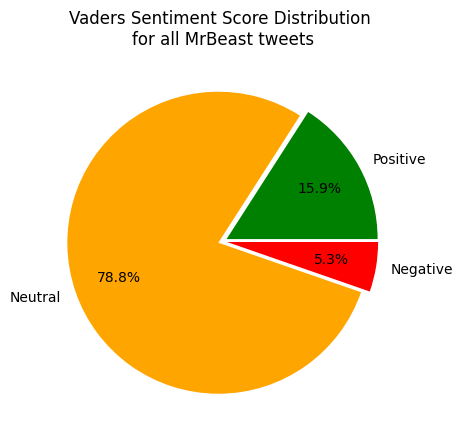

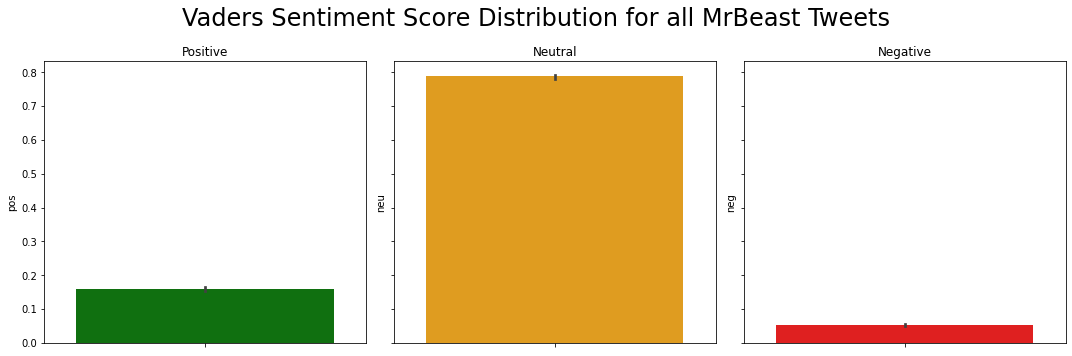

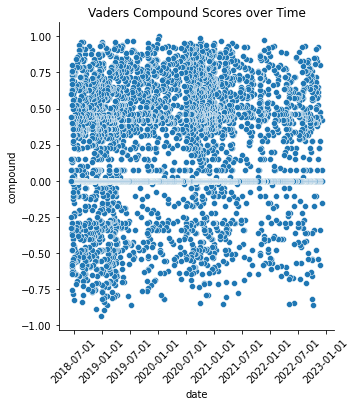

In [6]:
df = scrape_and_sentiment_tweets('MrBeast')

#### Print dataframe shape

In [7]:
df.shape

(5267, 10)

#### Display DataFrame Head

In [8]:
df.head()

,index,date,username,content,like_count,retweet_count,neg,neu,pos,compound
0,0,2022-12-05 22:43:44+00:00,MrBeast,@lexfridman When u coming to town to hangout? ...,823,17,0.000,1.000,0.000,0.0000
1,1,2022-12-05 21:37:08+00:00,MrBeast,@lexfridman I applied,7165,73,0.000,1.000,0.000,0.0000
2,2,2022-12-05 06:35:11+00:00,MrBeast,@elonmusk That would have been nice to know a ...,47471,423,0.000,0.781,0.219,0.4215
3,3,2022-12-05 03:51:53+00:00,MrBeast,"@streamys I feel bad, we should let someone el...",36805,451,0.215,0.552,0.233,0.0772
4,4,2022-12-05 01:55:35+00:00,MrBeast,@thegameawards Of course they do this while I’...,23987,380,0.000,1.000,0.000,0.0000


#### Display Dataframe Tail

In [9]:
df.tail()

,index,date,username,content,like_count,retweet_count,neg,neu,pos,compound
5262,5262,2018-06-16 15:16:53+00:00,MrBeast,We had issues powering things with potatoes so...,2378,71,0.000,1.000,0.0,0.0000
5263,5263,2018-06-16 15:07:22+00:00,MrBeast,@animesh_61912 I swallowed that pill and now I...,164,4,0.000,1.000,0.0,0.0000
5264,5264,2018-06-16 15:06:11+00:00,MrBeast,Rate this me me,684,18,0.000,1.000,0.0,0.0000
5265,5265,2018-06-16 15:01:03+00:00,MrBeast,Take that youtube https://t.co/SgShQtk72r,4021,151,0.000,1.000,0.0,0.0000
5266,5266,2018-06-16 14:37:15+00:00,MrBeast,"@Sorrowfell But you don’t follow me, I’m filin...",302,11,0.227,0.773,0.0,-0.3291
